In [1]:
# Modified from Jimmy Chang's codes

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 28, 28)
training labels (60000,)
testing inputs (10000, 28, 28)
testing inputs (10000,)


In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 784)
training labels (60000, 10)
testing inputs (10000, 784)
testing inputs (10000, 10)


In [6]:
print('Building model using SGD(lr=0.1)')
''' 1. Model using large learning rate '''
model_large = Sequential()
model_large.add(Dense(512, input_dim=x_train.shape[1]))
model_large.add(Activation('sigmoid'))
model_large.add(Dense(512))
model_large.add(Activation('sigmoid'))
model_large.add(Dense(10))
model_large.add(Activation('softmax'))

print('Building model using SGD(lr=0.01)')
''' 2. Model using median learning rate '''
model_median = Sequential()
model_median.add(Dense(512, input_dim=x_train.shape[1]))
model_median.add(Activation('sigmoid'))
model_median.add(Dense(512))
model_median.add(Activation('sigmoid'))
model_median.add(Dense(10))
model_median.add(Activation('softmax'))

print('Building model using SGD(lr=0.001)')
''' 3. Model using small learning rate '''
model_small = Sequential()
model_small.add(Dense(512, input_dim=x_train.shape[1]))
model_small.add(Activation('sigmoid'))
model_small.add(Dense(512))
model_small.add(Activation('sigmoid'))
model_small.add(Dense(10))
model_small.add(Activation('softmax'))

Building model using SGD(lr=0.1)
Building model using SGD(lr=0.01)
Building model using SGD(lr=0.001)


In [8]:
''' set the learning rate of SGD optimizer to 0.1 '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd1 = SGD(lr=0.1,momentum=0.0,decay=0.0,nesterov=False)

model_large.compile(loss= 'categorical_crossentropy',
                    optimizer=sgd1,
                    metrics=['accuracy'])

history_large = model_large.fit(x_train, y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                shuffle=True,
                                validation_split=0.1)

''' set the learning rate of SGD optimizer to 0.01 '''
sgd2 = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

model_median.compile(loss= 'categorical_crossentropy',
                     optimizer=sgd2,
                     metrics=['accuracy'])

history_median = model_median.fit(x_train, y_train,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  shuffle=True,
                                  validation_split=0.1)

''' set the learning rate of SGD optimizer to 0.001 '''
sgd3 = SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False)

model_small.compile(loss= 'categorical_crossentropy',
                    optimizer=sgd3,
                    metrics=['accuracy'])

history_small = model_small.fit(x_train, y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                shuffle=True,
                                validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 4s 78us/step - loss: 1.6932 - acc: 0.4576 - val_loss: 0.8013 - val_acc: 0.7997
Epoch 2/12
54000/54000 [==============================] - 3s 48us/step - loss: 0.6469 - acc: 0.8171 - val_loss: 0.4417 - val_acc: 0.8848
Epoch 3/12
54000/54000 [==============================] - 3s 48us/step - loss: 0.4593 - acc: 0.8688 - val_loss: 0.3424 - val_acc: 0.9057
Epoch 4/12
54000/54000 [==============================] - 3s 48us/step - loss: 0.3967 - acc: 0.8859 - val_loss: 0.3123 - val_acc: 0.9097
Epoch 5/12
54000/54000 [==============================] - 3s 48us/step - loss: 0.3658 - acc: 0.8950 - val_loss: 0.2880 - val_acc: 0.9168
Epoch 6/12
54000/54000 [==============================] - 3s 47us/step - loss: 0.3456 - acc: 0.8996 - val_loss: 0.2726 - val_acc: 0.9230
Epoch 7/12
54000/54000 [==============================] - 3s 48us/step - loss: 0.3318 - acc: 0.9041 - val_loss: 0.2671 - val_acc:

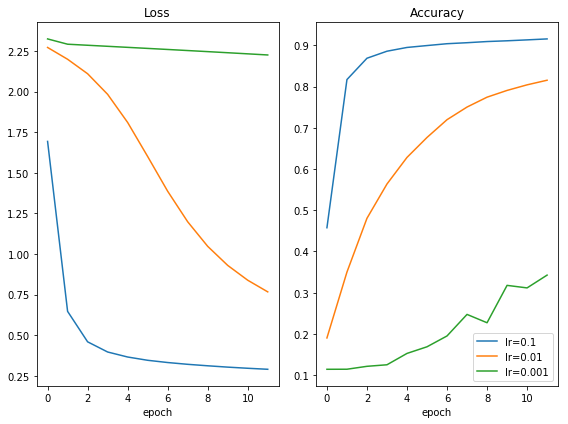

Result saved into 02_learningRateSelection.png


In [10]:
'''Access the loss and accuracy in every epoch'''
loss_large = history_large.history.get('loss')
acc_large = history_large.history.get('acc')
loss_median = history_median.history.get('loss')
acc_median = history_median.history.get('acc')
loss_small = history_small.history.get('loss')
acc_small = history_small.history.get('acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_large)), loss_large,label='lr=0.1')
plt.plot(range(len(loss_median)), loss_median,label='lr=0.01')
plt.plot(range(len(loss_small)), loss_small,label='lr=0.001')
plt.title('Loss')
plt.xlabel("epoch")
plt.subplot(122)
plt.plot(range(len(acc_large)), acc_large,label='lr=0.1')
plt.plot(range(len(acc_median)), acc_median,label='lr=0.01')
plt.plot(range(len(acc_small)), acc_small,label='lr=0.001')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('02_learningRateSelection.png',dpi=300,format='png')
plt.show()
plt.close()
print('Result saved into 02_learningRateSelection.png')